In [204]:
import numpy as np
import cv2 
import pytesseract
import imutils # görüntü işleme için kullanılır
from matplotlib import pyplot as plt 

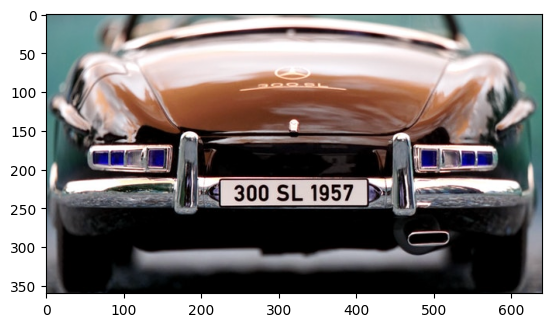

In [205]:
img = cv2.imread("9.1 licence_plate.jpg.jpg")
plt.imshow(img)

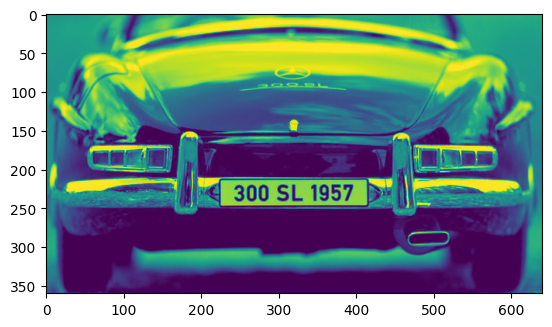

In [206]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [207]:
filtered = cv2.bilateralFilter(gray ,9,250,250 ) # resimdeki gereksiz kenarları (gürültü) yumusatarak  yok etmek

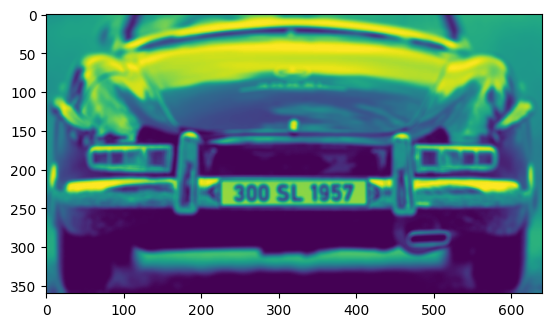

In [208]:
plt.imshow(filtered)

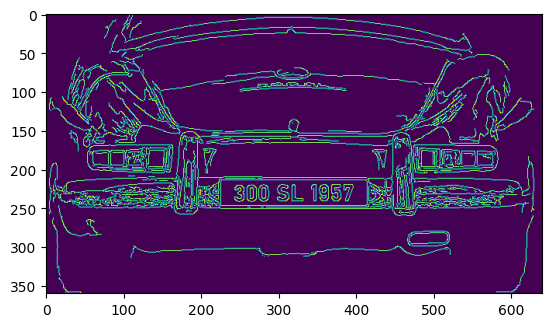

In [209]:
edges_gray = cv2.Canny(gray , 30,200)
plt.imshow(edges_gray)

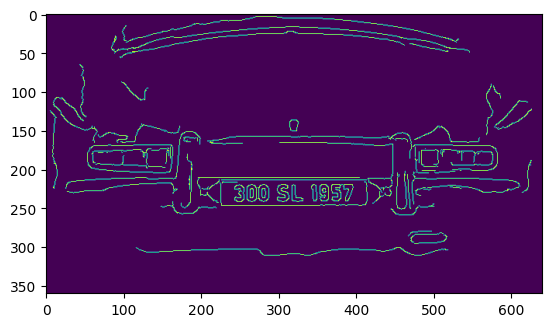

In [210]:
edges = cv2.Canny(filtered , 30,200) # resmimize yumusatma uyguladığımız için daha az gereksiz kenar bulunduruyor
plt.imshow(edges)

In [211]:
contours = cv2.findContours(edges , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)

In [212]:
contours

((array([[[116, 301]],
  
         [[117, 302]],
  
         [[118, 302]],
  
         [[120, 304]],
  
         [[122, 304]],
  
         [[123, 305]],
  
         [[125, 305]],
  
         [[126, 306]],
  
         [[128, 306]],
  
         [[129, 307]],
  
         [[145, 307]],
  
         [[146, 306]],
  
         [[163, 306]],
  
         [[164, 305]],
  
         [[186, 305]],
  
         [[187, 304]],
  
         [[221, 304]],
  
         [[222, 303]],
  
         [[272, 303]],
  
         [[273, 304]],
  
         [[274, 304]],
  
         [[276, 306]],
  
         [[276, 307]],
  
         [[279, 310]],
  
         [[280, 310]],
  
         [[281, 311]],
  
         [[301, 311]],
  
         [[302, 310]],
  
         [[310, 310]],
  
         [[311, 309]],
  
         [[327, 309]],
  
         [[328, 310]],
  
         [[332, 310]],
  
         [[333, 311]],
  
         [[341, 311]],
  
         [[342, 310]],
  
         [[344, 310]],
  
         [[345, 309]],
  
         [[3

In [213]:
len(contours)

2

In [214]:
cnts = imutils.grab_contours(contours) # uygun contourları yakalar

In [215]:
cnts

(array([[[116, 301]],
 
        [[117, 302]],
 
        [[118, 302]],
 
        [[120, 304]],
 
        [[122, 304]],
 
        [[123, 305]],
 
        [[125, 305]],
 
        [[126, 306]],
 
        [[128, 306]],
 
        [[129, 307]],
 
        [[145, 307]],
 
        [[146, 306]],
 
        [[163, 306]],
 
        [[164, 305]],
 
        [[186, 305]],
 
        [[187, 304]],
 
        [[221, 304]],
 
        [[222, 303]],
 
        [[272, 303]],
 
        [[273, 304]],
 
        [[274, 304]],
 
        [[276, 306]],
 
        [[276, 307]],
 
        [[279, 310]],
 
        [[280, 310]],
 
        [[281, 311]],
 
        [[301, 311]],
 
        [[302, 310]],
 
        [[310, 310]],
 
        [[311, 309]],
 
        [[327, 309]],
 
        [[328, 310]],
 
        [[332, 310]],
 
        [[333, 311]],
 
        [[341, 311]],
 
        [[342, 310]],
 
        [[344, 310]],
 
        [[345, 309]],
 
        [[348, 309]],
 
        [[349, 308]],
 
        [[350, 308]],
 
        [[351, 3

In [216]:
len(cnts)

105

In [217]:
#yakalanan contourlar içinde dikdörtgen olanı scebilmek icin sıralama yapacağız

cnts = sorted(cnts , key = cv2.contourArea , reverse = True )[0:10] # sıralama fonksiyonu 
screen = None 


In [218]:
#u döngü ile görüntüdeki tespit edilen contourlar arasında dikdörthen olanı cekmek
for c in cnts:
    
    epsilon = 0.018 * cv2.arcLength(c , True) # srclenght : contourların yay uzunluğunu bulmaktır    
    approx = cv2.approxPolyDP(c, epsilon , True) #  hatalı  sınır contourlarını azaltırız
    
    if len(approx) == 4: # contourun 4 tane sınırı (köşesi) varsa         
        screen = approx
        break
    
    

In [219]:
approx

array([[[394, 220]],

       [[396, 224]],

       [[390, 239]],

       [[387, 241]],

       [[386, 236]],

       [[390, 226]],

       [[385, 226]],

       [[384, 221]]], dtype=int32)

In [220]:
mask = np.zeros((360, 640) , np.uint8)

In [221]:
new_img = cv2.drawContours(mask ,[approx],0,(255,255,255),-1 )

In [222]:
cv2.imshow("img" , new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
new_img = cv2.bitwise_and(img ,img, mask = mask) # resime mask uygulayarak  sadece plaka görünecek sekilde diğer kısımları siyah yapar

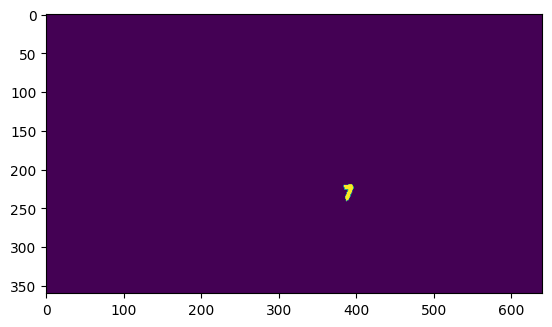

In [223]:
plt.imshow(new_img)

In [155]:
(x,y) = np.where(mask ==255) # piksel değerleri 255 olan kordinatlar

In [ ]:
(topx,topy) = (np.min(x) , np.min(y)) #plakanın x ve y de bulunduğu en kucuk kordinatlar cekilir
(botx , boty) = (np.max(x) , np.max(y)) # plakanın x ve y de bulunduğu en buyuk kordinatlar cekilir

In [ ]:
cropped = gray[topx:botx+1 , topy:boty+1 ]  #resimde kordinatları blunan plaka cekilir